<a href="https://colab.research.google.com/github/nathsmo/Elements-of-ML/blob/master/Tarea3_EoML_UFM_Nathalia_Morales_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problemas conceptuales



1.   Lee la sección 4.4.2 del libro Elements of Machine Learning. Trata sobre el uso de análisis de varianza en una base de datos de una enfermedad del corazón. Describe en qué consiste este análisis.
2.   Haz un resumen de la sección 4.5 del libro Introduction to Statistical Learning. Puedes describir las ventajas y desventajas de cada método de clasificación en un cuadro diagrama o en prosa. Además, describe los seis escenarios mostrados en la lectura y sintetiza cuáles fueron las razones por las que cada método fue mejor o peor que otros.
3.   Problema 7 del capítulo 4 de Introduction to Statistical Learning




# Respuestas
1. El análisis se trata sobre el modelo de la regressión logística aplicado en el estudio de: Coronary Risk-Factor Study (CORIS), el objetivo del estudio era establecer la intensidad del "ischemic heart disease risk factors" en un área de alta incidencia.
2. Chapter 6 illustrates how the 6 models work and what they require as inputs. Some notes:
  * Though their motivations differ, the logistic regression and LDA methods are closely connected. Both logistic regression and LDA produce linear decision boundaries.
  * LDA assumes that the observations are drawn from a Gaussian distribution with a common covariance matrix in each class, and so can provide some improvements over logistic regression when this assumption approximately holds.
  * Logistic regression can outperform LDA if these Gaussian assumptions are not met.
  * KNN is a completely non-parametric approach: no assumptions are made about the shape of the decision boundary. Therefore, we can expect this approach to dominate LDA and logistic regression when the decision boundary is highly non-linear.
  * On the other hand, KNN does not tell which predictors are important.
  * QDA servers as a compromise between the non-parametric KNN method and the linear LDA and logistic regression approaches. Since QDA assumes a quadratic decision boundary, it can accurately model a wider range of problems than can the linear methods.
  * QDA can perform better in the presence of a limited number of training observations because it does make some assumptions about the form of the decision boundary.
  * THe six examples illustrate that no one method will dominate the others in every situation. 
  * True decision boundaries are linear, then the LDA and logistic regression approaches will tend to perform well.
  * Boundaries are moderately non-linear, QDA may give better results.
  * Complicated decision boundaries, a non-parametric approach such as KNN can be superior.

3. La respuesta es 0.75, para conseguir la respuesta solo se mete el X = 4 a la ecuación 4.12 y meterlo en una calculadora.

# Problema aplicado

Utiliza la base de datos Auto en http://www-bcf.usc.edu/~gareth/ISL/data.html para predecir si un carro tiene alto o bajo consumo de gasolina.


1.   Crea una variable binaria mpg01 que contiene 1 si mpg tiene un valor mayor a la mediana y 0 si tiene un valor menor a la mediana. Haz un nuevo dataset con esta columna y otras variables importantes del dataset original de auto.
2.   Usa representaciones gráficas como gráficas de dispersión y diagramas de cajas para investigar qué otras variables están asociadas a mpg01.
3.   Separa los datos en de entrenamiento y de prueba.
4.   Queremos predecir mpg01. Utiliza las variables que según tu análisis en b) estaban más asociadas como predictores. Harás más de cuatro modelos, uno con LDA, luego QDA, luego regresión logística y por último KNN (con diferentes valores de k).
5.   Calcula el error de prueba de cada modelo y compáralos. Qué método de clasificación es tu preferido? Argumenta tu respuesta como si fuera un escenario de la sección 4.5 del libro



In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Auto.csv', sep = ',')
df = pd.DataFrame(data=df)

## 1

In [0]:
mpg_median = df["mpg"].median()
dt = df
dt['mpg01'] = np.where(dt['mpg']>mpg_median, 1, 0)
dt = dt.drop(['name','mpg'], axis=1)

## 2



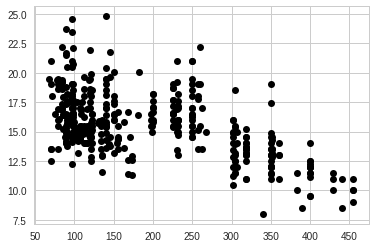

In [0]:
x = dt['displacement']
y = dt['acceleration']

plt.plot(x, y, 'o', color='black');

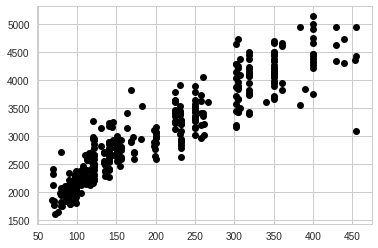

In [0]:
x = dt['displacement']
y = dt['weight']

plt.plot(x, y, 'o', color='black');

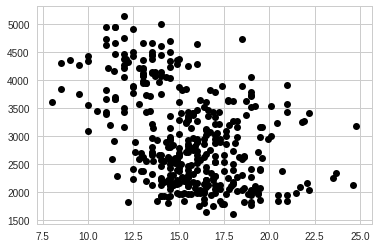

In [0]:
x = dt['acceleration']
y = dt['weight']

plt.plot(x, y, 'o', color='black');

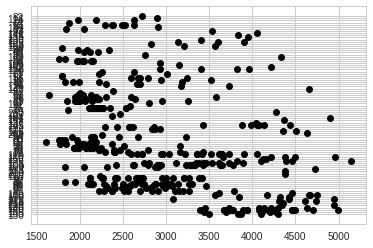

In [0]:
x = dt['weight']
y = dt['horsepower']

plt.plot(x, y, 'o', color='black');

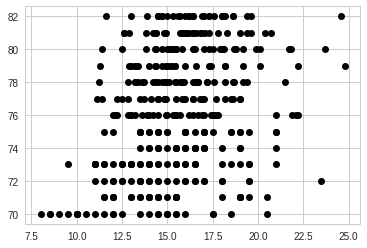

In [0]:
x = dt['acceleration']
y = dt['year']

plt.plot(x, y, 'o', color='black');

## 3

In [0]:
y = dt['mpg01']
X = dt.drop(columns=['mpg01'])
X['displacement'] =  X['displacement'].astype(int)
X=X.replace('?', np.nan)
X["horsepower"] = X["horsepower"].fillna(0).astype(int)
X['horsepower'] =  X['horsepower'].astype(int)
X['horsepower'].unique()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 4 y 5

In [0]:
## LDA
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
print("Score:", model.score(X_test, y_test))

Score: 0.4833169486177954


In [0]:
## QDA
clf = QuadraticDiscriminantAnalysis()
model = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("Score:", model.score(X_test, y_test))


Score: 0.8


In [0]:
## Logistic Regression
logreg = LogisticRegression()
model = logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
print("Score:", model.score(X_test, y_test))

Score: 0.85


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
## KNN
### Different k values
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)  
print("Score:", knn.score(X_test, y_test))

Score: 0.7875


In [0]:
knn = KNeighborsClassifier(n_neighbors=10)  
knn.fit(X_train, y_train)  
print("Score:", knn.score(X_test, y_test))

Score: 0.7625


In [0]:
knn = KNeighborsClassifier(n_neighbors=15)  
knn.fit(X_train, y_train)  
print("Score:", knn.score(X_test, y_test))

Score: 0.8


In [0]:
knn = KNeighborsClassifier(n_neighbors=50)  
knn.fit(X_train, y_train)  
print("Score:", knn.score(X_test, y_test))

Score: 0.8


## 5 Conclusiones

 Qué método de clasificación es tu preferido? Argumenta tu respuesta como si fuera un escenario de la sección 4.5 del libro

* La regression logistica tiene el mejor resultado, sin embargo me gusta mas la adaptacion del modelo de K nearest Neighbours. Tambien por otra parte QDA tiene el mejor score que el numero limite (porque a partir de el no cambia) que el de KNN.
* Para el caso en el que lo estamos probando se puede notar que la data entre displacement y el peso esta tiene forma linear, iguamente varios de los datos parecen tener ese patron, e incluso en el scatterplot de acceleracion y peso se nota una curva lineal en los datos. Aun cuando LDA no pudo predecir los daots, significa que los datos si tienen un tipo de relacion entre ellos que puede ser encontrado en cluster, por esta razon creo que el mejor modelo para la data seria la regression logistica porque parece que la data no cumple con los requisitos de una distribucion gaussiana pero si tiene otro tipo de relacion.